# Numpy 

Pythonでは，値の集合を「コンテナ」と呼び，代表的なものとして

- リスト(List): `[1, 'two', [3], 3.14]`
    - タプル(Tuple): `(1, 'two', [3], 3.14)`
    - 文字列(Str): `'aa83988848'`
- 集合(Set): `{1, 'two', [3], 3.14}`
    - 辞書(Dict): `{'v1':1, 'v2':'two', 'v3':[3], 'v4':3.14}`

があります．コンテナは，基本的に各要素が異なる型(クラス)でも構いません．要素がさらにコンテナであっても構いません．

In [1]:
MyList = [1, 'two', [3], 3.14]
MyTuple = (1, 'two', [3], 3.14)
MyStr = 'aa83988848'
MySet = {1, 'two', 3.14} # setはコンテナを要素に持てない
MyDict = {'v1':1, 'v2':'two', 'v3':[3], 'v4':3.14}

print('==MyList==')
print(f'{MyList}\n')

print('==MyTuple==')
print(f'{MyTuple}\n')

print('==MyStr==')
print(f'{MyStr}\n')

print('==MySet==')
print(f'{MySet}\n')

print('==MyDict==')
print(f'{MyDict}\n')


==MyList==
[1, 'two', [3], 3.14]

==MyTuple==
(1, 'two', [3], 3.14)

==MyStr==
aa83988848

==MySet==
{1, 3.14, 'two'}

==MyDict==
{'v1': 1, 'v2': 'two', 'v3': [3], 'v4': 3.14}



これらのコンテナに対して演算をすると

In [2]:
print('==MyList * 3==')
print(f'{MyList * 3}\n')

print('==MyTuple * 3==')
print(f'{MyTuple * 3}\n')

print('==MyStr * 3==')
print(f'{MyStr * 3}\n')

#print('==MySet * 3==')
#print(f'{MySet * 3}\n') # Setは演算できない

#print('==MyDict * 3==')
#print(f'{MyDict * 3}'\n) # Dictは演算できない

MyList2 = [1, 2, 3]
print('==MyList + MyList2==')
print(f'{MyList + MyList2}\n')

==MyList * 3==
[1, 'two', [3], 3.14, 1, 'two', [3], 3.14, 1, 'two', [3], 3.14]

==MyTuple * 3==
(1, 'two', [3], 3.14, 1, 'two', [3], 3.14, 1, 'two', [3], 3.14)

==MyStr * 3==
aa83988848aa83988848aa83988848

==MyList + MyList2==
[1, 'two', [3], 3.14, 1, 2, 3]

==MyList * 3==
[1, 'two', [3], 3.14, 1, 'two', [3], 3.14, 1, 'two', [3], 3.14]

==MyTuple * 3==
(1, 'two', [3], 3.14, 1, 'two', [3], 3.14, 1, 'two', [3], 3.14)

==MyStr * 3==
aa83988848aa83988848aa83988848

==MyList + MyList2==
[1, 'two', [3], 3.14, 1, 2, 3]



というように，後ろに繰り返し要素を付け加えることになります．

それぞれの要素に対し演算するには，どうしたらいいでしょうか．そのような演算をベクトル演算といいます．

ベクトル演算をするためのコンテナをNumpy Arrayといいます．

NumPyというパッケージにNumPy Arrayクラスが定義されています．

## Numpy Array

In [3]:
import numpy as np

MyList = [2, 3, 5,7]
print('==MyList==')
print(f'{MyList}\n')

print('==MyList * 3==')
print(f'{MyList * 3}\n')

MyArray = np.array(MyList)
print('==MyArray==')
print(f'{MyArray}\n')

print('==MyArray * 3==')
print(f'{MyArray * 3}\n')

==MyList==
[2, 3, 5, 7]

==MyList * 3==
[2, 3, 5, 7, 2, 3, 5, 7, 2, 3, 5, 7]

==MyArray==
[2 3 5 7]

==MyArray * 3==
[ 6  9 15 21]




要素数の異なるNumpyArrayとの加算はできません．

In [4]:
MyArray2 = np.array(MyList2)
print('==MyArray + MyArray2==')
#print(f'{MyArray + MyArray2}')

==MyArray + MyArray2==


NumpyArrayは，線形代数における行列やベクトルなので，行列やベクトルに対する演算しか許されないというわけです．

## テンソル

「NumpyArrayは，行列やベクトル」と言いましたが，行列やベクトルには形があります．

```
M = [1 2 3]
    [4 5 6]
```

のとき，Mの形は「2行3列」です．

```
v = [7]
    [8]
    [9]
```

のとき，vの形は「3行1列」ですね．

```
u = [10 11]
```

のとき，uの形は「1行2列」ですね．

NumpyArrayで 2行3列の行列を作ってみましょう．
すべての要素がゼロな2行3列の行列は，Numpyのzeros関数で作ることができます．


In [5]:
M = np.zeros((2,3))
print(M)


[[0. 0. 0.]
 [0. 0. 0.]]


行列の形は 属性`.shape`に保存されています．

In [6]:
print(M.shape)

(2, 3)


形(2,3)のMを`print`したときの表示を見てみると，「行ごとの3つの要素がリストになっており，2行のリストをさらにリストに」しています．

実は，このようなリストからNumpyArrayを作ることもできます．

In [7]:
u1 = [1,2,3]
u2 = [4,5,6]
L = [u1, u2]
M = np.array(L)
print(M)
print(M.shape)


[[1 2 3]
 [4 5 6]]
(2, 3)


では，7と8と9を要素にもつ1行3列のNumpyArrayを作ってみましょう．行ごとにリストに，全体をさらにリストにします．つまり2重リストになります．

In [8]:
Lx = [[7,8,9]]
x = np.array(Lx)
print(x)
print(x.shape)

[[7 8 9]]
(1, 3)


このxを転置すれば，Mxが計算できます．転置はNumpyの`transpose`関数を使います．また，行列積はNumpyの`matmul`関数です．(ちなみに`*`は要素積（要素同士の積）です．)

In [9]:
R = np.matmul(M, np.transpose(x))
print(R)
print(R.shape)

[[ 50]
 [122]]
(2, 1)


皆が知っているように，行列積は，「左の行列の列数」と「右の行列の行数」が同じでなければいけません．上の例の場合，(2,3)と(3,1)なので行列積は(2,1)となるわけですね．

ところで，xは行列でしょうか？ベクトルでしょうか？

行ベクトルとか列ベクトルと言われているものですが，Numpyでは
「行数」とか「列数」とか言っているので，これは「行列」なのです．では，ベクトルは？

ベクトルとは，1重のリストから作ったものをいいます．「行」や「列」という概念がありません．

In [10]:
Ly = [7,8,9]
y = np.array(Ly)
print(y)
print(y.shape)

[7 8 9]
(3,)


さきほどの x は形が(1,3)で，転置した`np.transpose(x)`は(3,1)でした．今度の y は(3,)です．さきほどの行列積ができます．

In [11]:
R2 = np.matmul(M, y)
print(R2)
print(R2.shape)

[ 50 122]
(2,)


R2はさきほどのRと要素は同じ数値ですが，(2,1)ではなく(2,)となります．（行列積の作られ方どおりです．）

まとめると
- 行列: 2重のリストから作られる．形は (S1, S2)，行数S1, 列数S2
- ベクトル: 1重のリストから作られる．形は (S1,), 要素数S1

行列積は，np.matmul関数で，
- 左のArrayの形が(S1,S2)で，右のArrayの形が(S3,S4)のとき，S2==S3なら演算できて，答えのArrayの形は(S1,S4)

転置は np.transpose関数で，
- 形が(S1,S2)の行列の転置は，形が(S2,S1)となる
- 形が(S1,)のベクトルの転置は，形が変わらず(S1,)となる


In [12]:
print(y.shape)
yt = np.transpose(y)
print(yt.shape)

(3,)
(3,)


行列やベクトルをまとめて，一般的に「テンソル」と言います．さきほどの「n重のリスト」の`n`を階数といいます．

- 行列: 2階テンソル
- ベクトル: 1階テンソル

ここで，1重リストを並べたものをさらにリストにすれば，2重リストになるので，すなわち(S1,)ベクトル（1階テンソル）をS2個並べると(S2,S1)行列（2階テンソル）になるということです．
要素が(S1,)ベクトルである(S2,)ベクトルは，(S2,S1)という行列になります．

属性`.ndim`に保存されています．属性`.shape`に保存されている「形」を表すタプルの要素数でもあります．

In [13]:
A1 = np.array([1,2,3,4])
print(A1)
print(f'shape(形):{A1.shape}')
print(f'ndim(階数):{A1.ndim}')
print(f'size(要素数):{A1.size}')
print('\n')

A2 = np.array([[1,2,3,4]])
print(A2)
print(f'shape(形):{A2.shape}')
print(f'ndim(階数):{A2.ndim}')
print(f'size(要素数):{A2.size}')
print('\n')

A3 = np.array([[[1,2,3,4]]])
print(A2)
print(f'shape(形):{A3.shape}')
print(f'ndim(階数):{A3.ndim}')
print(f'size(要素数):{A3.size}')
print('\n')



[1 2 3 4]
shape(形):(4,)
ndim(階数):1
size(要素数):4


[[1 2 3 4]]
shape(形):(1, 4)
ndim(階数):2
size(要素数):4


[[1 2 3 4]]
shape(形):(1, 1, 4)
ndim(階数):3
size(要素数):4




3階以上になっても行列積(テンソル積)は同じです．

In [14]:
T3 = np.array([[[1,2,3,4]]])
T1 = np.array([5,6,7,8])
Result = np.matmul(T3,T1)
print(f'{T3.ndim}階テンソル（形{T3.shape})と{T1.ndim}階テンソル(形{T1.shape})の行列積は{Result.ndim}階テンソル（形{Result.shape})')
print(Result)

3階テンソル（形(1, 1, 4))と1階テンソル(形(4,))の行列積は2階テンソル（形(1, 1))
[[70]]


## 抽出

In [15]:
M = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
print(M,type(M),M.shape,M.ndim,M.size,'\n')

M_row = M[1] # 行
print(M_row,type(M_row),M_row.shape,M_row.ndim,M_row.size,'\n')

M_item = M[1][2] # (1,2)要素 M[1,2]とは書けない
print(M_item,type(M_item),M_item.shape,M_item.ndim,M_item.size,'\n')

M_slice = M[1:3,0:2] #スライス
print(M_slice,type(M_slice),M_slice.shape,M_slice.ndim,M_slice.size,'\n')

M_column = M[:,1] # 列抽出はスライスで
print(M_column,type(M_column),M_column.shape,M_column.ndim,M_column.size,'\n')

M_sub = M[[0,2],[1,3]] # (0,1)要素と(2,3)要素　（スライス）
print(M_sub,type(M_sub),M_sub.shape,M_sub.ndim,M_sub.size)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]] <class 'numpy.ndarray'> (3, 4) 2 12 

[5 6 7 8] <class 'numpy.ndarray'> (4,) 1 4 

7 <class 'numpy.int64'> () 0 1 

[[ 5  6]
 [ 9 10]] <class 'numpy.ndarray'> (2, 2) 2 4 

[ 2  6 10] <class 'numpy.ndarray'> (3,) 1 3 

[ 2 12] <class 'numpy.ndarray'> (2,) 1 2


## 追加

In [16]:
u1 = np.array([[1,2],[3,4]])
u2 = np.array([[11,12],[13,14]])

print('==np.concat: 階数を変えずに，連結する．==')
M1 = np.concatenate([u1,u2])
print(M1)
print(f'形:{M1.shape},階:{M1.ndim},要素数:{M1.size}\n')
M2 = np.concatenate([u1,u2],axis=1)
print(M2)
print(f'形:{M2.shape},階:{M2.ndim},要素数:{M2.size}\n')

print('==np.stack: 指定した階に，積む==')
M3 = np.stack([u1,u2],axis=0)
print(M3)
print(f'形:{M3.shape},階:{M3.ndim},要素数:{M3.size}\n')

M4 = np.stack([u1,u2],axis=1)
print(M4)
print(f'形:{M4.shape},階:{M4.ndim},要素数:{M4.size}\n')

M5 = np.stack([u1,u2],axis=2)
print(M5)
print(f'形:{M5.shape},階:{M5.ndim},要素数:{M5.size}\n')


==np.concat: 階数を変えずに，連結する．==
[[ 1  2]
 [ 3  4]
 [11 12]
 [13 14]]
形:(4, 2),階:2,要素数:8

[[ 1  2 11 12]
 [ 3  4 13 14]]
形:(2, 4),階:2,要素数:8

==np.stack: 指定した階に，積む==
[[[ 1  2]
  [ 3  4]]

 [[11 12]
  [13 14]]]
形:(2, 2, 2),階:3,要素数:8

[[[ 1  2]
  [11 12]]

 [[ 3  4]
  [13 14]]]
形:(2, 2, 2),階:3,要素数:8

[[[ 1 11]
  [ 2 12]]

 [[ 3 13]
  [ 4 14]]]
形:(2, 2, 2),階:3,要素数:8



# 形を変形

In [17]:
T = np.array([[1,2,3,4],[5,6,7,8]])
print(T)
print(f'形:{T.shape}, 階:{T.ndim}, 要素数:{T.size}\n')

T2 = np.reshape(T,(1,8))
print(T2)
print('前から順に8要素のリストを1個')
print(f'形:{T2.shape}, 階:{T2.ndim}, 要素数:{T2.size}\n')

T3 = np.reshape(T,(8,1))
print(T3)
print('前から順に1要素のリストを8個')
print(f'形:{T3.shape}, 階:{T3.ndim}, 要素数:{T3.size}\n')


T4 = np.reshape(T,(4,2))
print(T4)
print('前から順に2要素のリストを4個')
print(f'形:{T4.shape}, 階:{T4.ndim}, 要素数:{T4.size}\n')

T5 = np.reshape(T,(8,))
print(T5)
print('前から順に8要素')
print(f'形:{T5.shape}, 階:{T5.ndim}, 要素数:{T5.size}\n')

T6 = np.reshape(T,(1,2,4))
print(T6)
print('前から順に4要素2個の要素を1個')
print(f'形:{T6.shape}, 階:{T6.ndim}, 要素数:{T6.size}\n')


[[1 2 3 4]
 [5 6 7 8]]
形:(2, 4), 階:2, 要素数:8

[[1 2 3 4 5 6 7 8]]
前から順に8要素のリストを1個
形:(1, 8), 階:2, 要素数:8

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]]
前から順に1要素のリストを8個
形:(8, 1), 階:2, 要素数:8

[[1 2]
 [3 4]
 [5 6]
 [7 8]]
前から順に2要素のリストを4個
形:(4, 2), 階:2, 要素数:8

[1 2 3 4 5 6 7 8]
前から順に8要素
形:(8,), 階:1, 要素数:8

[[[1 2 3 4]
  [5 6 7 8]]]
前から順に4要素2個の要素を1個
形:(1, 2, 4), 階:3, 要素数:8



## pandasのデータフレーム

行列といえば，データフレームと見た目が似ています．
- どちらも，行の要素数が各列で同じ，列の要素数が各行で同じでなければならない．（普通のList,Tuple,Set,Dictでは違う）

ということで，

- 2階テンソル（行列）のNumpyArrayはpandasデータフレームに変換できます．: pandasの`DataFrame`関数
- pandasデータフレームは，2階のNumpyArray（行列）に変換できます．: pandasのDataFrameクラスの`to_numpy`メソッド

NumpyArrayの行が，pandasの1行のサンプルに対応しています．


In [18]:
import pandas as pd

M = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
print(M)
print('\n')


columnsM = ['v0','v1','v2','v3']
indexM = ['#1','#2','#3']
df = pd.DataFrame(M,columns=columnsM,index=indexM)
print(df)
print('\n')

M2 = df.to_numpy()
print(M2)


[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


    v0  v1  v2  v3
#1   1   2   3   4
#2   5   6   7   8
#3   9  10  11  12


[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


## pandas.read_htmlによるスクレイピング

ホームページや画像などからデータフレームを読み込む操作を「スクレイピング」と呼びます．

例えば，長崎の気温変化をデータフレームに読み込んでみましょう．

長崎の気温変化は，[Link](https://www.data.jma.go.jp/obd/stats/etrn/view/monthly_s3.php?prec_no=84&block_no=47817&year=&month=&day=&view=a1)にあります．

このページには，文章の中に，表がありますね．

pandasの`read_html`関数はURLを指定すると，そのURLのページに含まれる表の数だけデータフレームを作って，そのリストを返します．

pythonコードによるスクレイピングは，機械的な自動操作なのでホームページ作成者から敬遠される傾向があります．
もしpythonコードからhttps経由でファイルを読み込めない場合は，普段使っているウェブブラウザで手動で読み込み，ページを`stats_nagasaki.html`などと名前をつけて保存し，
それを読み込むように変更してください．







In [19]:
import lxml
from datetime import datetime

#URL = 'https://www.data.jma.go.jp/obd/stats/etrn/view/monthly_s3.php?prec_no=84&block_no=47817&year=&month=&day=&view=a1'
URL = 'stats_nagasaki.html'
df_List = pd.read_html(URL,header=0)
df_List[0]

,年,1月,2月,3月,4月,5月,6月,7月,8月,9月,10月,11月,12月,年の値
0,1878,NaN,NaN,NaN,NaN,NaN,NaN,26.0,26.6,24.9,19.2,12.1,6.9,19.3 ]
1,1879,5.7,7.7,8.8,14.2,18.6,21.9,26.6,27.6,23.3,17.2,12.1,8.4,16.0
2,1880,4.8,8.3,9.9,14.1,19.4,21.2,25.4,25.8,23.7,18.8,11.7,5.3,15.7
3,1881,4.0,5.9,7.5,14.1,18.8,22.3,26.3,27.8,24.6,18.2,13.6,7.9,15.9
4,1882,7.3,6.7,8.8,14.7,17.9,20.6,25.0,26.4,23.0,19.4,12.3,6.8,15.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,2019,8.1,9.4,11.9,15.8,20.2,23.0,25.8,27.7,26.0,20.9,15.1,10.6,17.9
142,2020,9.7,9.8,12.3,14.0,20.2,24.1,25.5,28.8,24.3,19.6,15.3,8.5,17.7
143,2021,7.4,10.3,13.9,16.7,19.8,23.7,27.9,27.3,25.7,21.1,14.1,9.2,18.1
144,2022,7.1,6.5,12.9,16.4,20.0,23.9,27.8,28.6,25.9,19.9,16.5,7.8,17.8


まず，月ごとに列を成していますが，この列名は「年」と合わせて，1列にすべきです．


In [20]:
df = df_List[0].drop(columns=['年の値']) # 「年の値」という列をデータフレームから消す
df


,年,1月,2月,3月,4月,5月,6月,7月,8月,9月,10月,11月,12月
0,1878,NaN,NaN,NaN,NaN,NaN,NaN,26.0,26.6,24.9,19.2,12.1,6.9
1,1879,5.7,7.7,8.8,14.2,18.6,21.9,26.6,27.6,23.3,17.2,12.1,8.4
2,1880,4.8,8.3,9.9,14.1,19.4,21.2,25.4,25.8,23.7,18.8,11.7,5.3
3,1881,4.0,5.9,7.5,14.1,18.8,22.3,26.3,27.8,24.6,18.2,13.6,7.9
4,1882,7.3,6.7,8.8,14.7,17.9,20.6,25.0,26.4,23.0,19.4,12.3,6.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,2019,8.1,9.4,11.9,15.8,20.2,23.0,25.8,27.7,26.0,20.9,15.1,10.6
142,2020,9.7,9.8,12.3,14.0,20.2,24.1,25.5,28.8,24.3,19.6,15.3,8.5
143,2021,7.4,10.3,13.9,16.7,19.8,23.7,27.9,27.3,25.7,21.1,14.1,9.2
144,2022,7.1,6.5,12.9,16.4,20.0,23.9,27.8,28.6,25.9,19.9,16.5,7.8


In [21]:
df2 = pd.melt(df,id_vars=['年'],value_vars=df.columns[1:]) # pd.melt() : 先週やった pivotの逆操作
df2

,年,variable,value
0,1878,1月,NaN
1,1879,1月,5.7
2,1880,1月,4.8
3,1881,1月,4.0
4,1882,1月,7.3
...,...,...,...
1747,2019,12月,10.6
1748,2020,12月,8.5
1749,2021,12月,9.2
1750,2022,12月,7.8


In [22]:
df2['date'] = df2['年'].astype(str)+'年'+df2['variable']
df2['date']

0        1878年1月
1        1879年1月
2        1880年1月
3        1881年1月
4        1882年1月
          ...   
1747    2019年12月
1748    2020年12月
1749    2021年12月
1750    2022年12月
1751    2023年12月
Name: date, Length: 1752, dtype: object

In [23]:
df2['date2'] = [datetime.strptime(s,'%Y年%m月') for s in df2['date']]
df2['date2']

0      1878-01-01
1      1879-01-01
2      1880-01-01
3      1881-01-01
4      1882-01-01
          ...    
1747   2019-12-01
1748   2020-12-01
1749   2021-12-01
1750   2022-12-01
1751   2023-12-01
Name: date2, Length: 1752, dtype: datetime64[ns]

In [24]:
df3 = df2.drop(columns=['年','variable','date'])
df3.head()

,value,date2
0,NaN,1878-01-01
1,5.7,1879-01-01
2,4.8,1880-01-01
3,4.0,1881-01-01
4,7.3,1882-01-01


In [25]:
df3.columns=['temperature','Date']
df4 = df3.set_index('Date')
df5 = df4.sort_index()
df5

,temperature
Date,
1878-01-01,NaN
1878-02-01,NaN
1878-03-01,NaN
1878-04-01,NaN
1878-05-01,NaN
...,...
2023-08-01,NaN
2023-09-01,NaN
2023-10-01,NaN


In [26]:
df5['temperature'] = df5['temperature'].astype(str)

In [27]:
df6 = df5['temperature'].str.extract('([ 0-9.]+)')
df6.columns=['temperature']
df6['temperature'] = df6['temperature'].astype(float)
df6.sort_index(inplace=True)
df6.dropna(inplace=True)
df6.tail(12)

,temperature
Date,
2022-07-01,27.8
2022-08-01,28.6
2022-09-01,25.9
2022-10-01,19.9
2022-11-01,16.5
2022-12-01,7.8
2023-01-01,7.4
2023-02-01,9.2
2023-03-01,13.6


## matplotlib

Matplotlibは，入力した系列に対応してグラフを描くライブラリです．

下のようなグラフを描きます．このグラフに書いてある用語（英単語）をそのまま覚えてください．
![「図」の解剖](https://matplotlib.org/stable/_images/anatomy.png)

- Figure：フィギュア：所謂，キャンバスのことです．Figureに描かれるのは，
    - 複数のグラフ(Axes)
    - キャンバスのタイトル，凡例

- Axes：アクセス：所謂，グラフのことです．Axesに描かれるのは，
    - 軸線(Axis)
    - 軸ラベル(xlabel, ylabel)
    - プロット（Plot, データを使って書かれた線や点）

- Axis：アクシス：所謂，軸線のことです．Axis上に描かれるのは，
    - 目盛印(Tick，ティック)：目盛として軸に刻みで描かれる細い線
    - 目盛文字列(Tick Label)：目盛の刻みに振られる文字列（数直線ならば数字．数字でなくてもいい）



グラフを描くには，

1. まず，キャンバスを用意する


In [28]:
from matplotlib import pyplot as plt
plt.style.use(['science','ieee'])

fig = plt.figure(tight_layout=True,figsize=(4,6),facecolor='white')
fig

<Figure size 2400x3600 with 0 Axes>

<Figure size 2400x3600 with 0 Axes>


2. グラフ領域を用意する: `fig.add_subplot(3,2,4)`
    
    例) キャンバスを3行2列の行列状に領域を分けたときの左上から4番目の領域


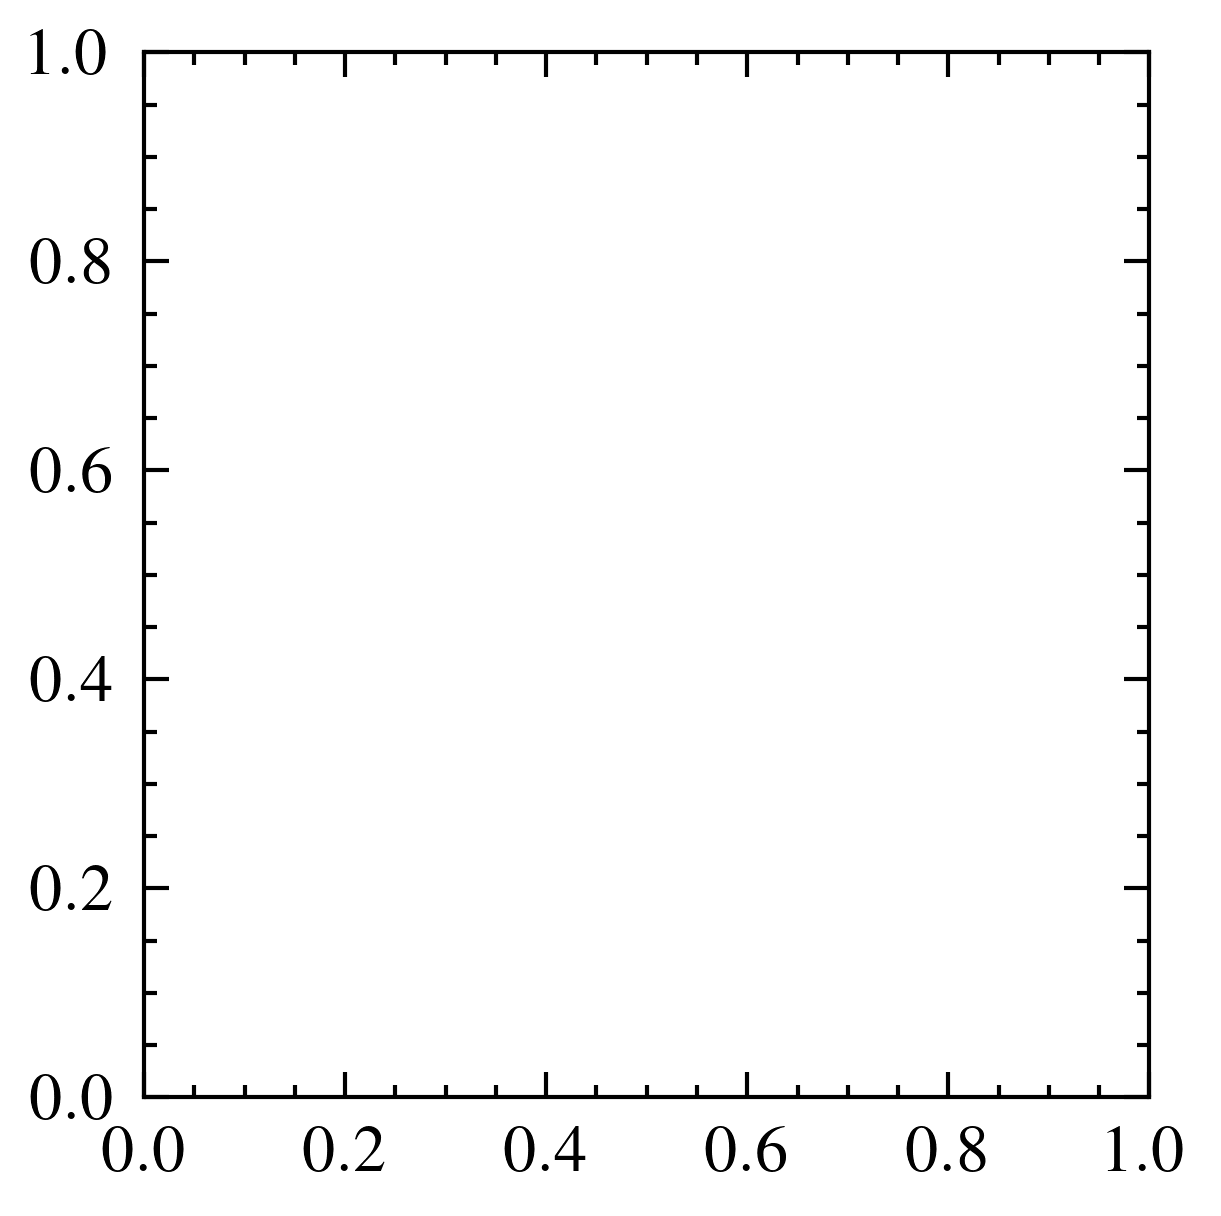

In [29]:
ax1 = fig.add_subplot(3,2,4)
fig

2. グラフを描く
    
    2.1. プロットを描く  

        ```
        ax1.plot(x座標の系列, y座標の系列)
        ```


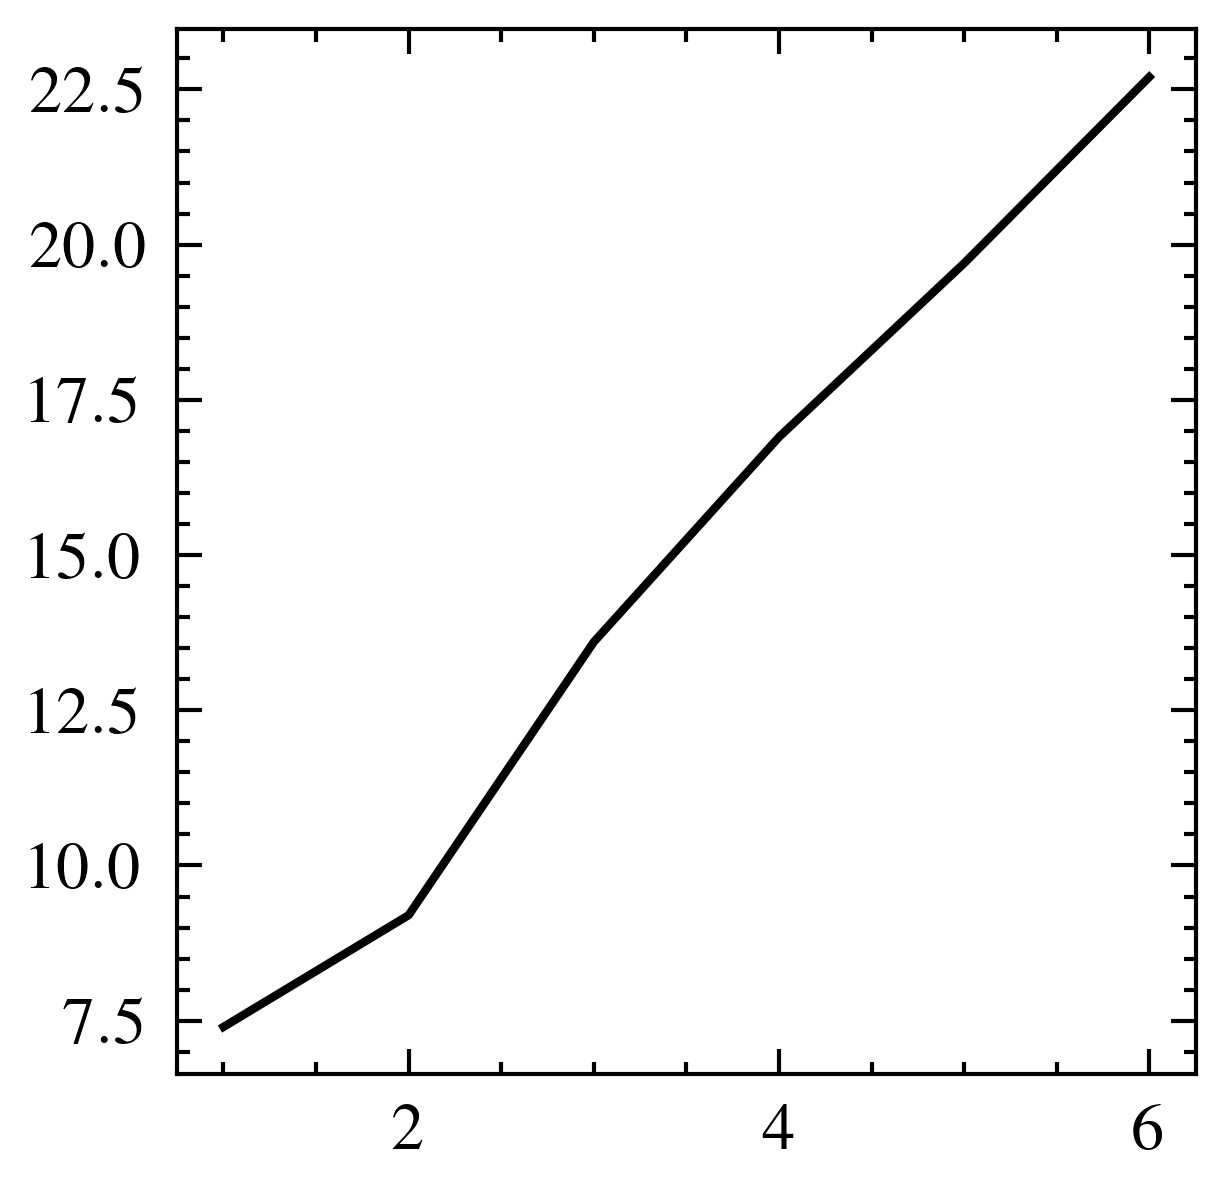

In [30]:
ax1.plot([1,2,3,4,5,6], df6['temperature'][-6:])
fig

    2.2. 軸ラベル，タイトル，凡例を補正する
    
        ```
        ax1.set_xlabel('横軸ラベル')
        ```
    


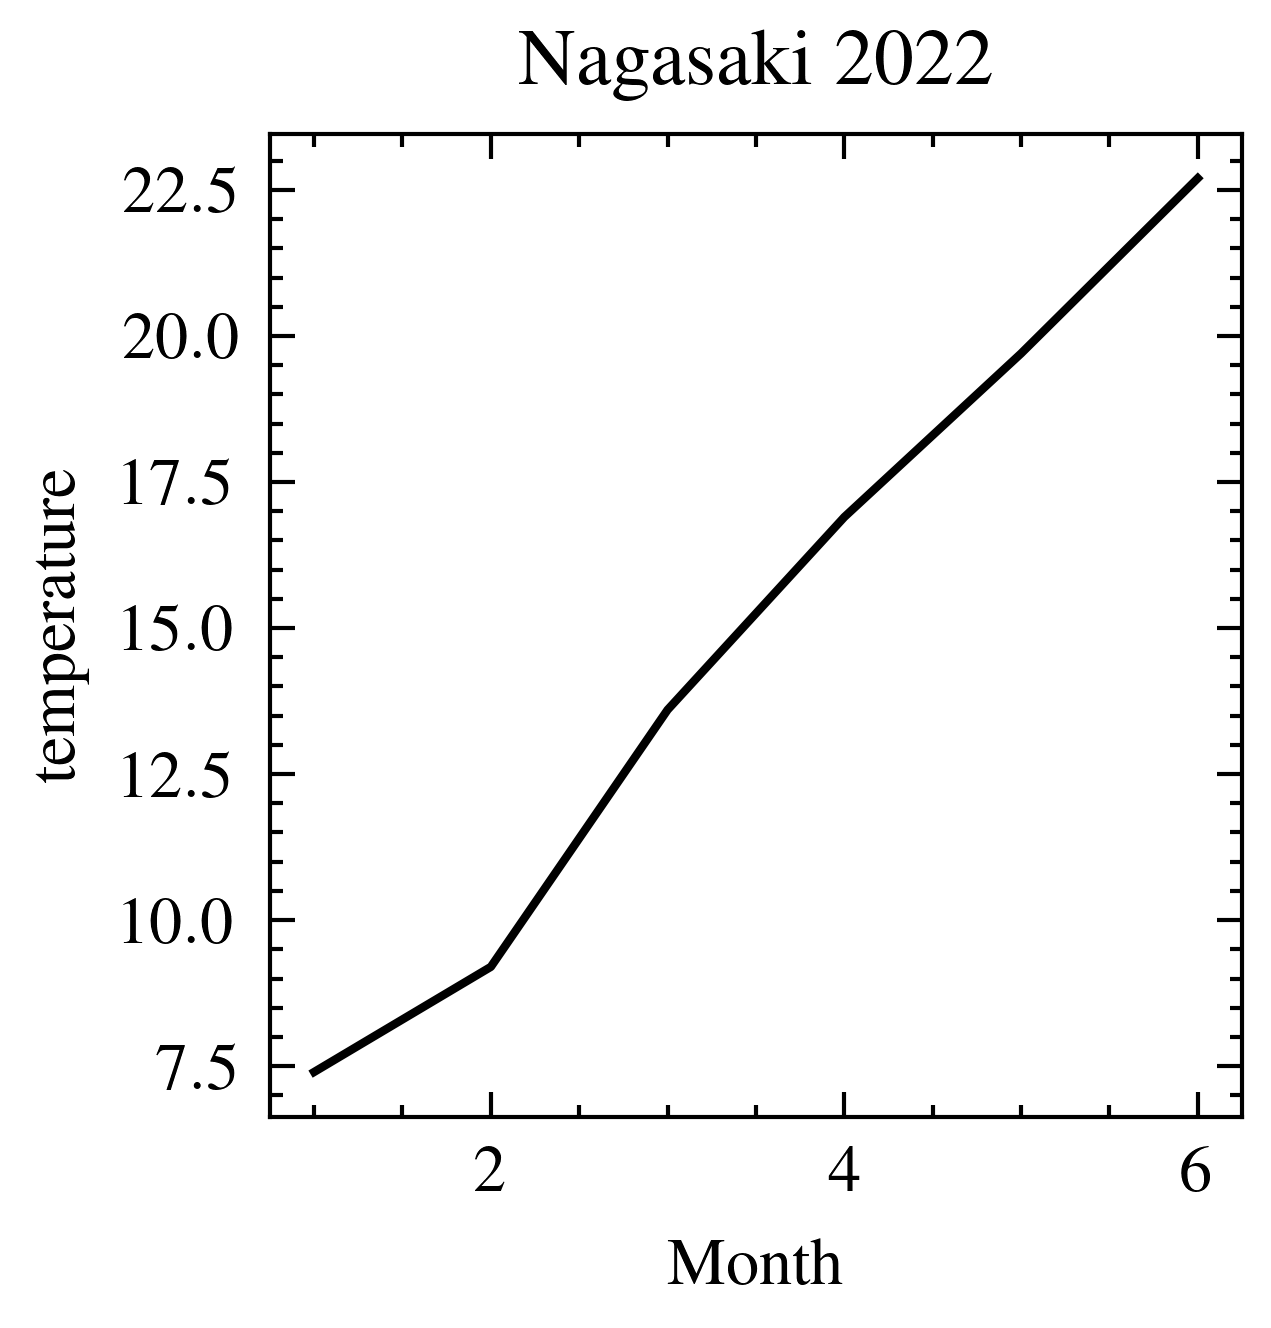

In [31]:
ax1.set_xlabel('Month')
ax1.set_ylabel('temperature')
ax1.set_title('Nagasaki 2022')
fig

    2.3. グリッド線をつけたり，表示領域を決めたり
        ```
        ax1.set_xlim()
        ax1.grid()
        ```


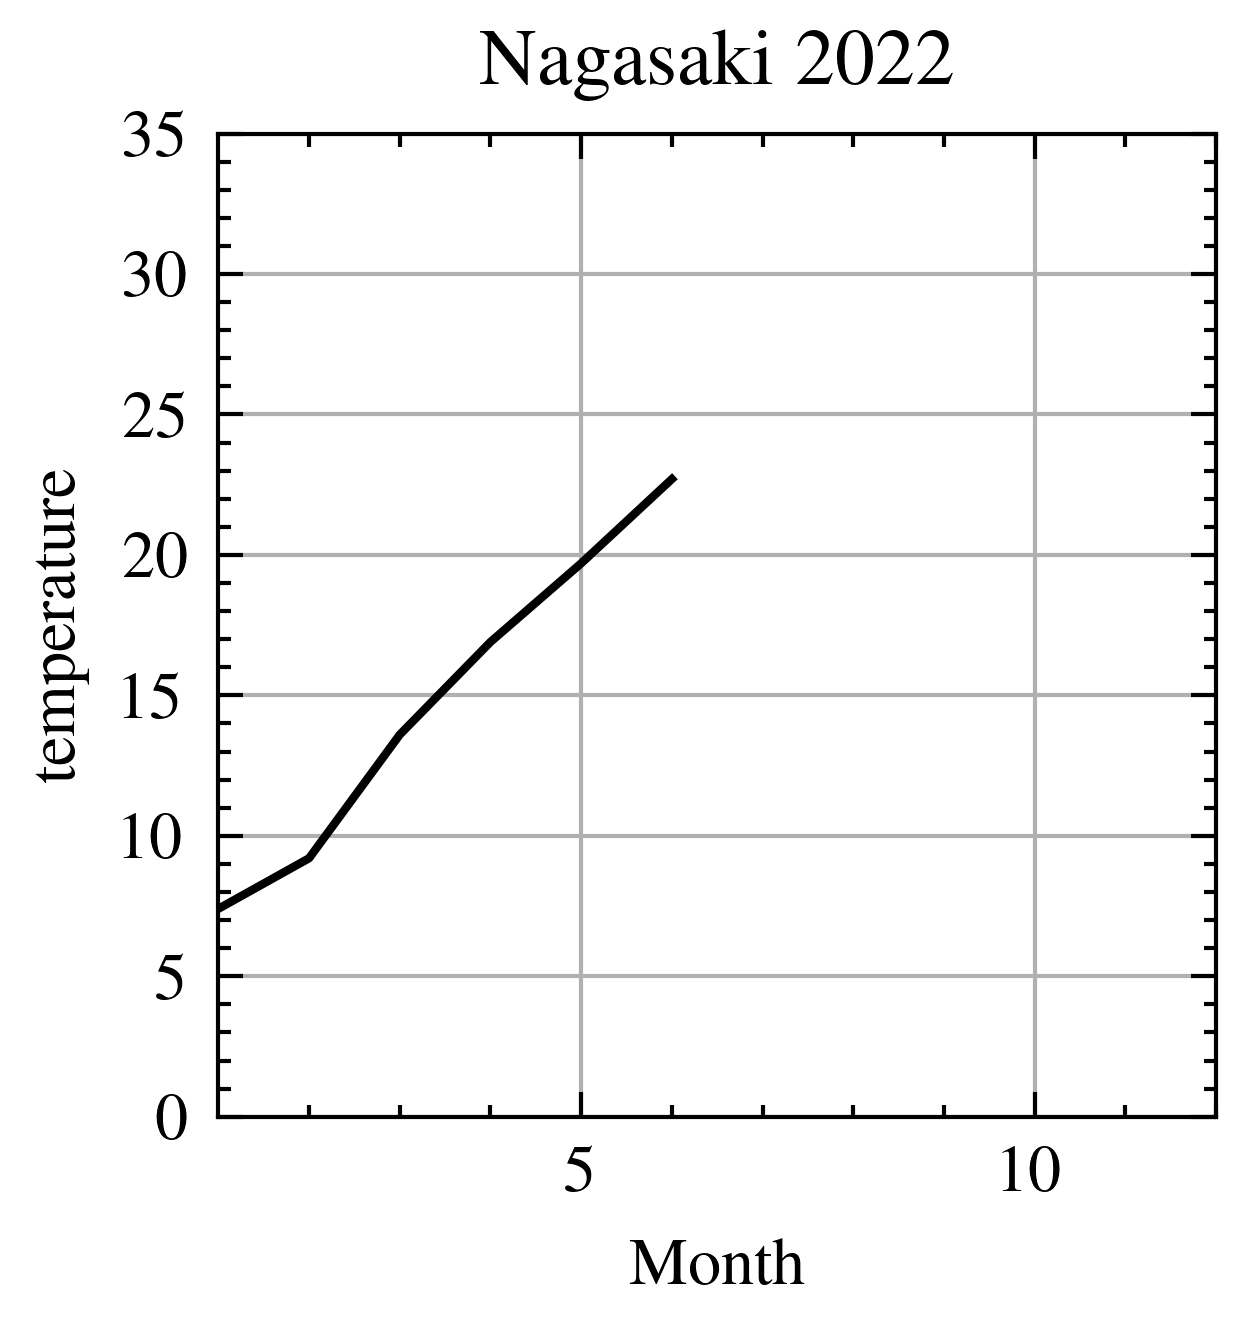

In [32]:

ax1.set_ylim([0,35])
ax1.set_xlim([1,12])
ax1.grid()
fig

キャンバスの別の領域に別のグラフを書く

DatetimeIndex(['1878-07-01', '1878-08-01', '1878-09-01', '1878-10-01',
               '1878-11-01', '1878-12-01'],
              dtype='datetime64[ns]', name='Date', freq=None)


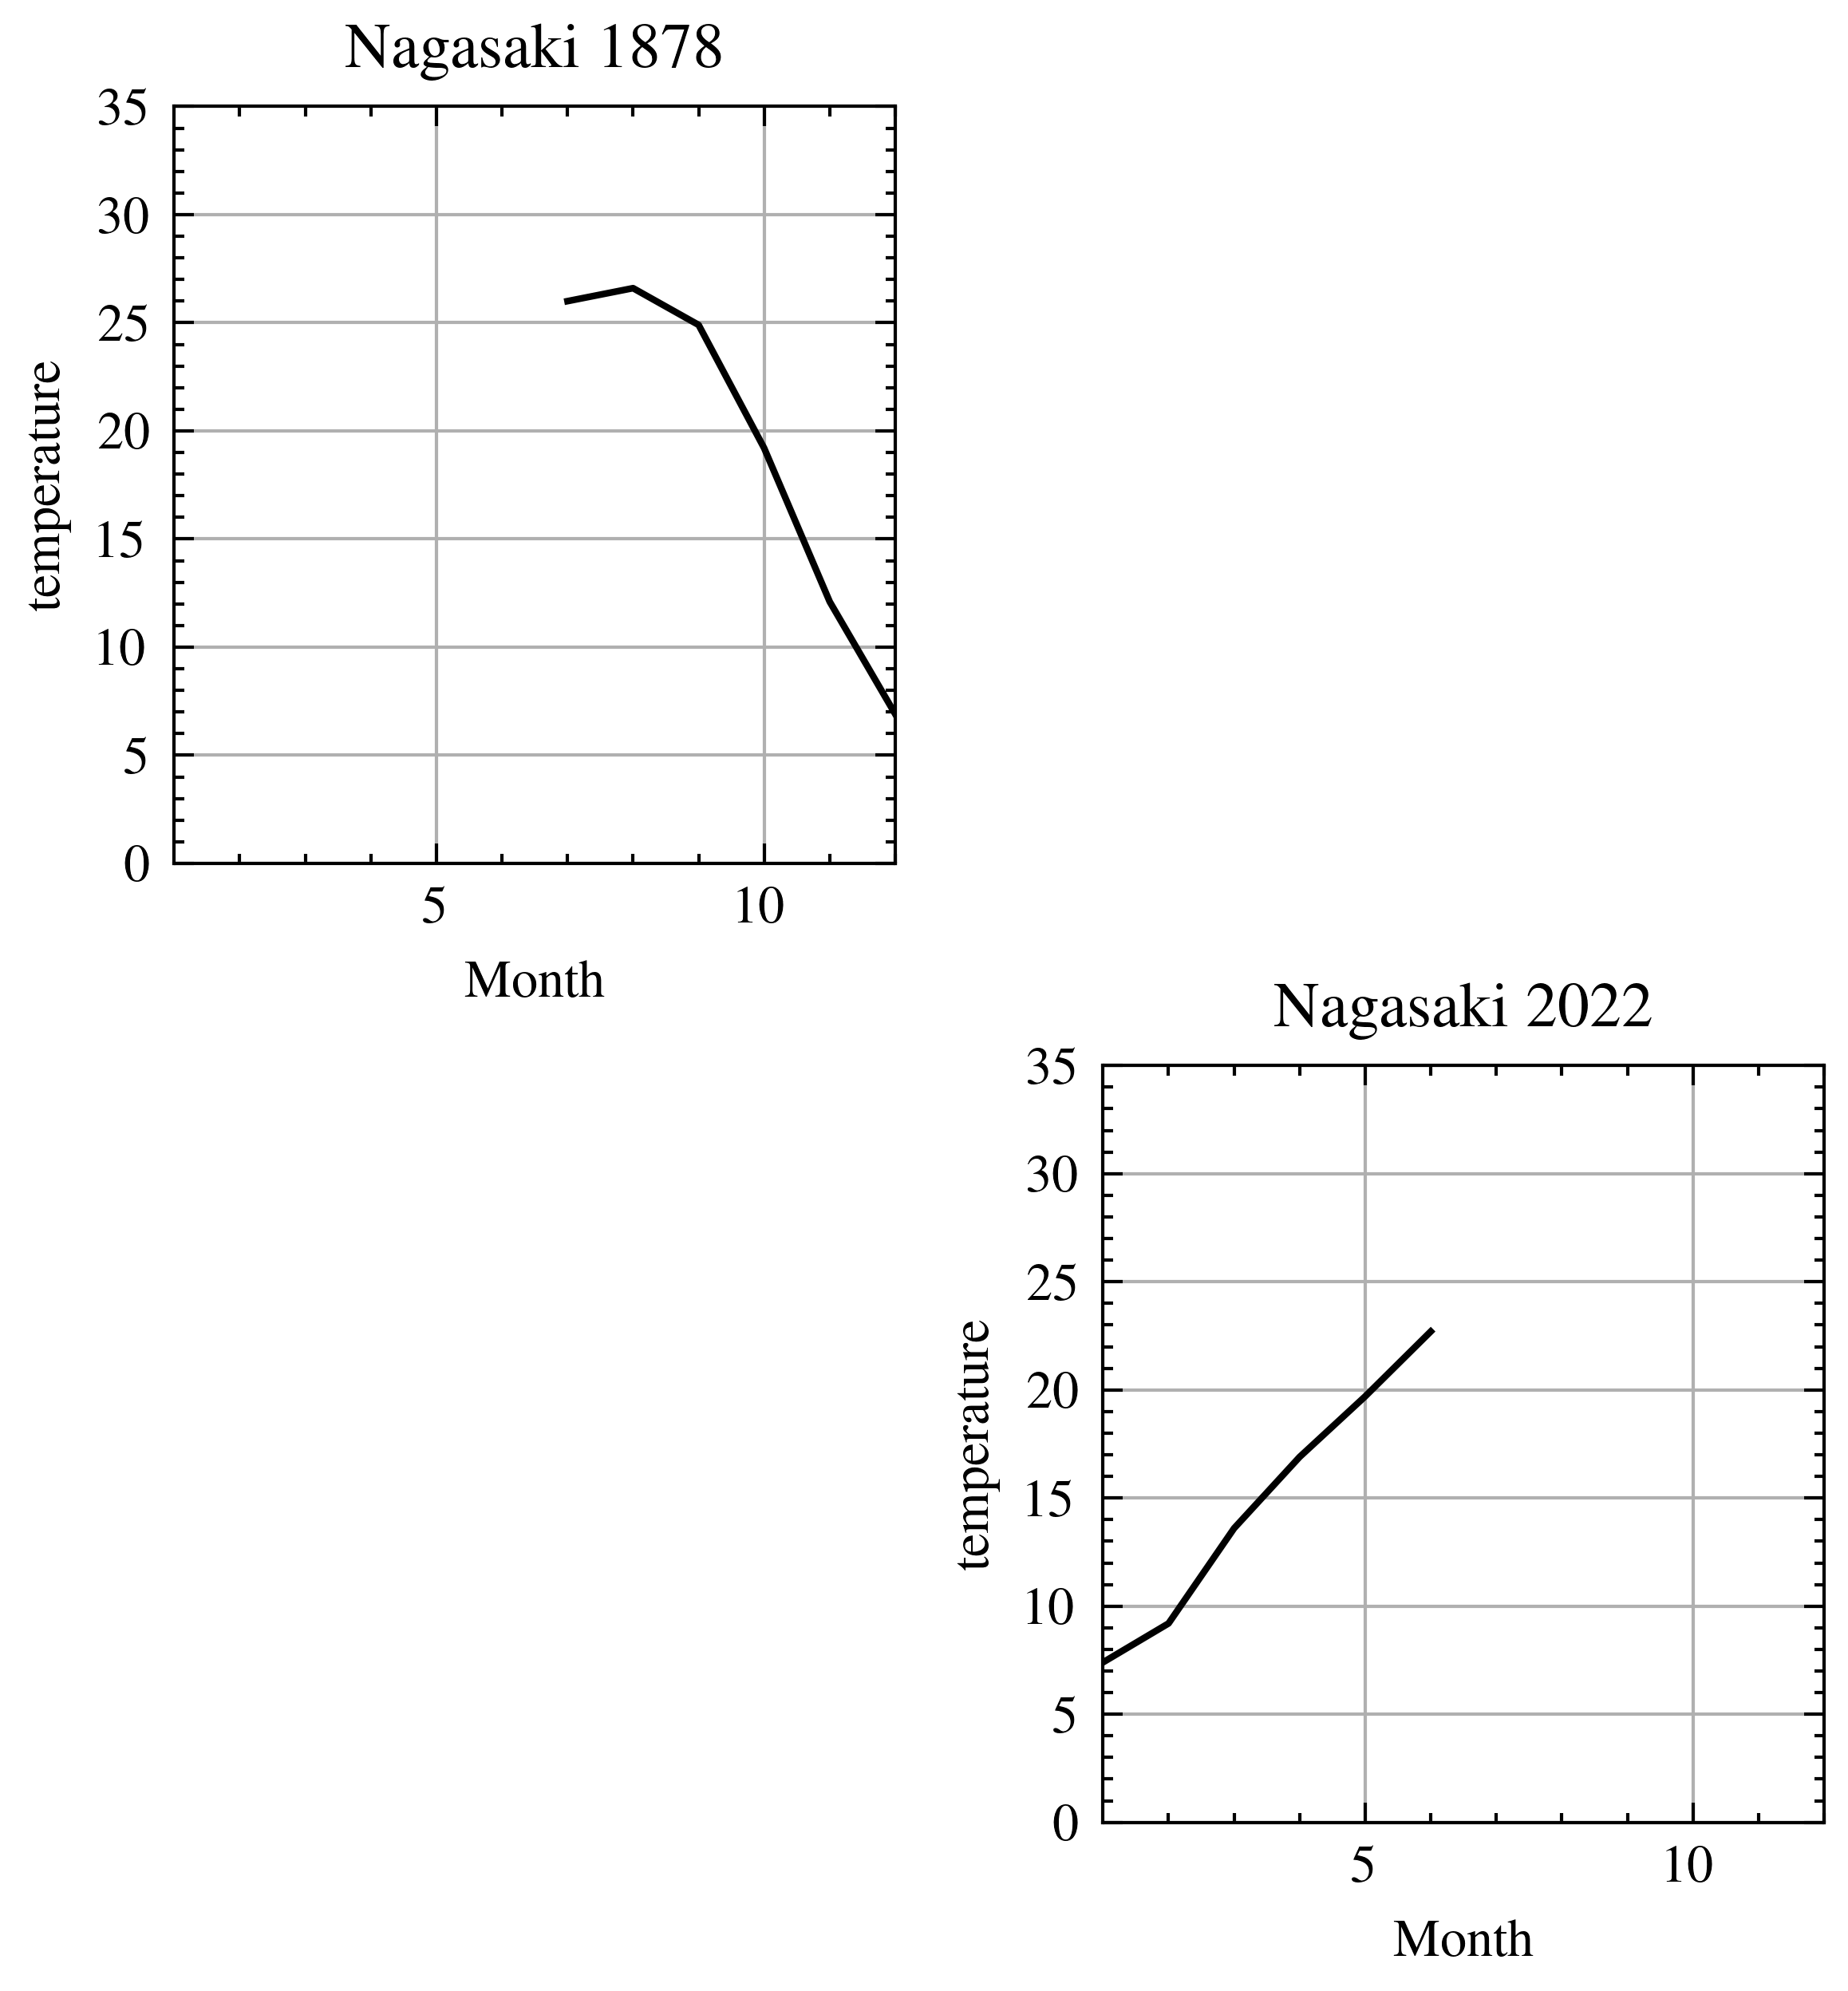

In [33]:
ax2 = fig.add_subplot(3,2,1)
print(df6.index[:6])
ax2.plot([7,8,9,10,11,12],df6['temperature'][:6])
ax2.set_xlabel('Month')
ax2.set_ylabel('temperature')
ax2.set_title('Nagasaki 1878')
ax2.set_ylim([0,35])
ax2.set_xlim([1,12])
ax2.grid()
fig

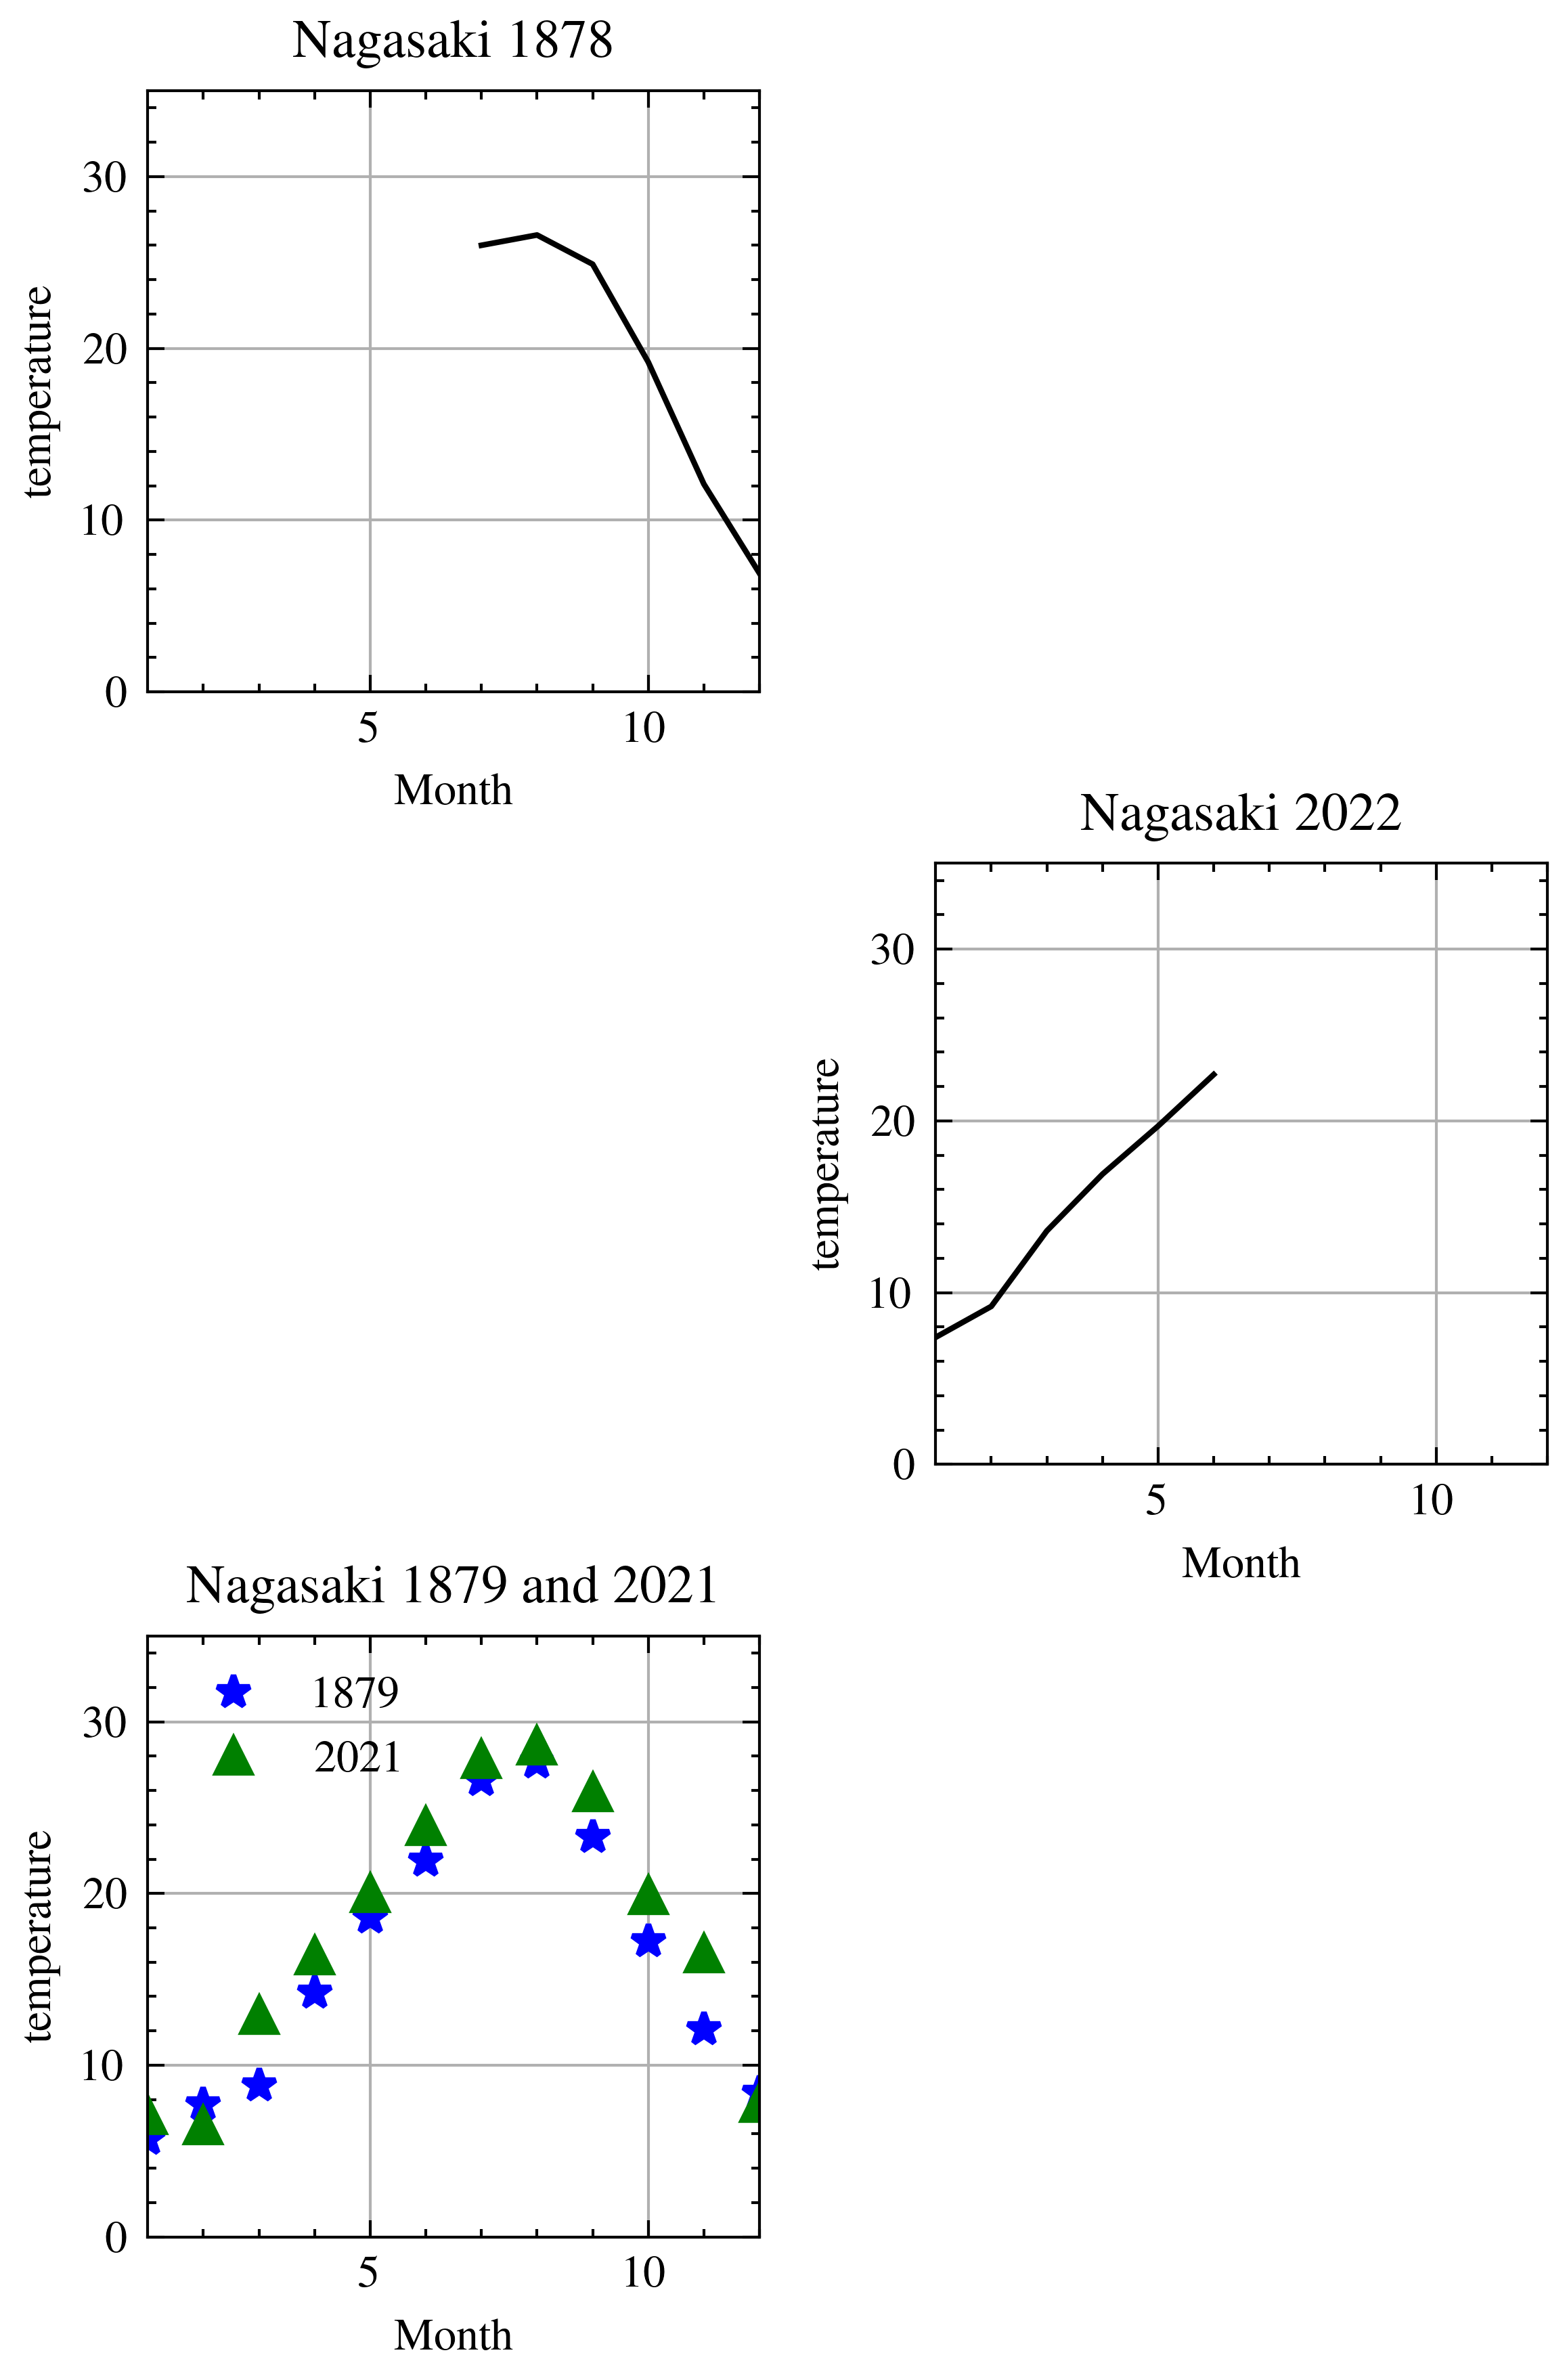

In [34]:
ax3 = fig.add_subplot(3,2,5)
ax3.plot(range(1,13),df6['temperature'][6:18],'b*',label='1879')
ax3.plot(range(1,13),df6['temperature'][-18:-6],'g^',label='2021')
ax3.set_xlabel('Month')
ax3.set_ylabel('temperature')
ax3.set_title('Nagasaki 1879 and 2021')
ax3.set_ylim([0,35])
ax3.set_xlim([1,12])
ax3.legend(loc='best')
ax3.grid()
fig

箱ひげ図を書くこともできる．: `boxplot`

- 箱ひげ図を置く横軸目盛を`positions`で指定する

/Users/kotaro/.anyenv/envs/pyenv/versions/3.10.6/lib/python3.10/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


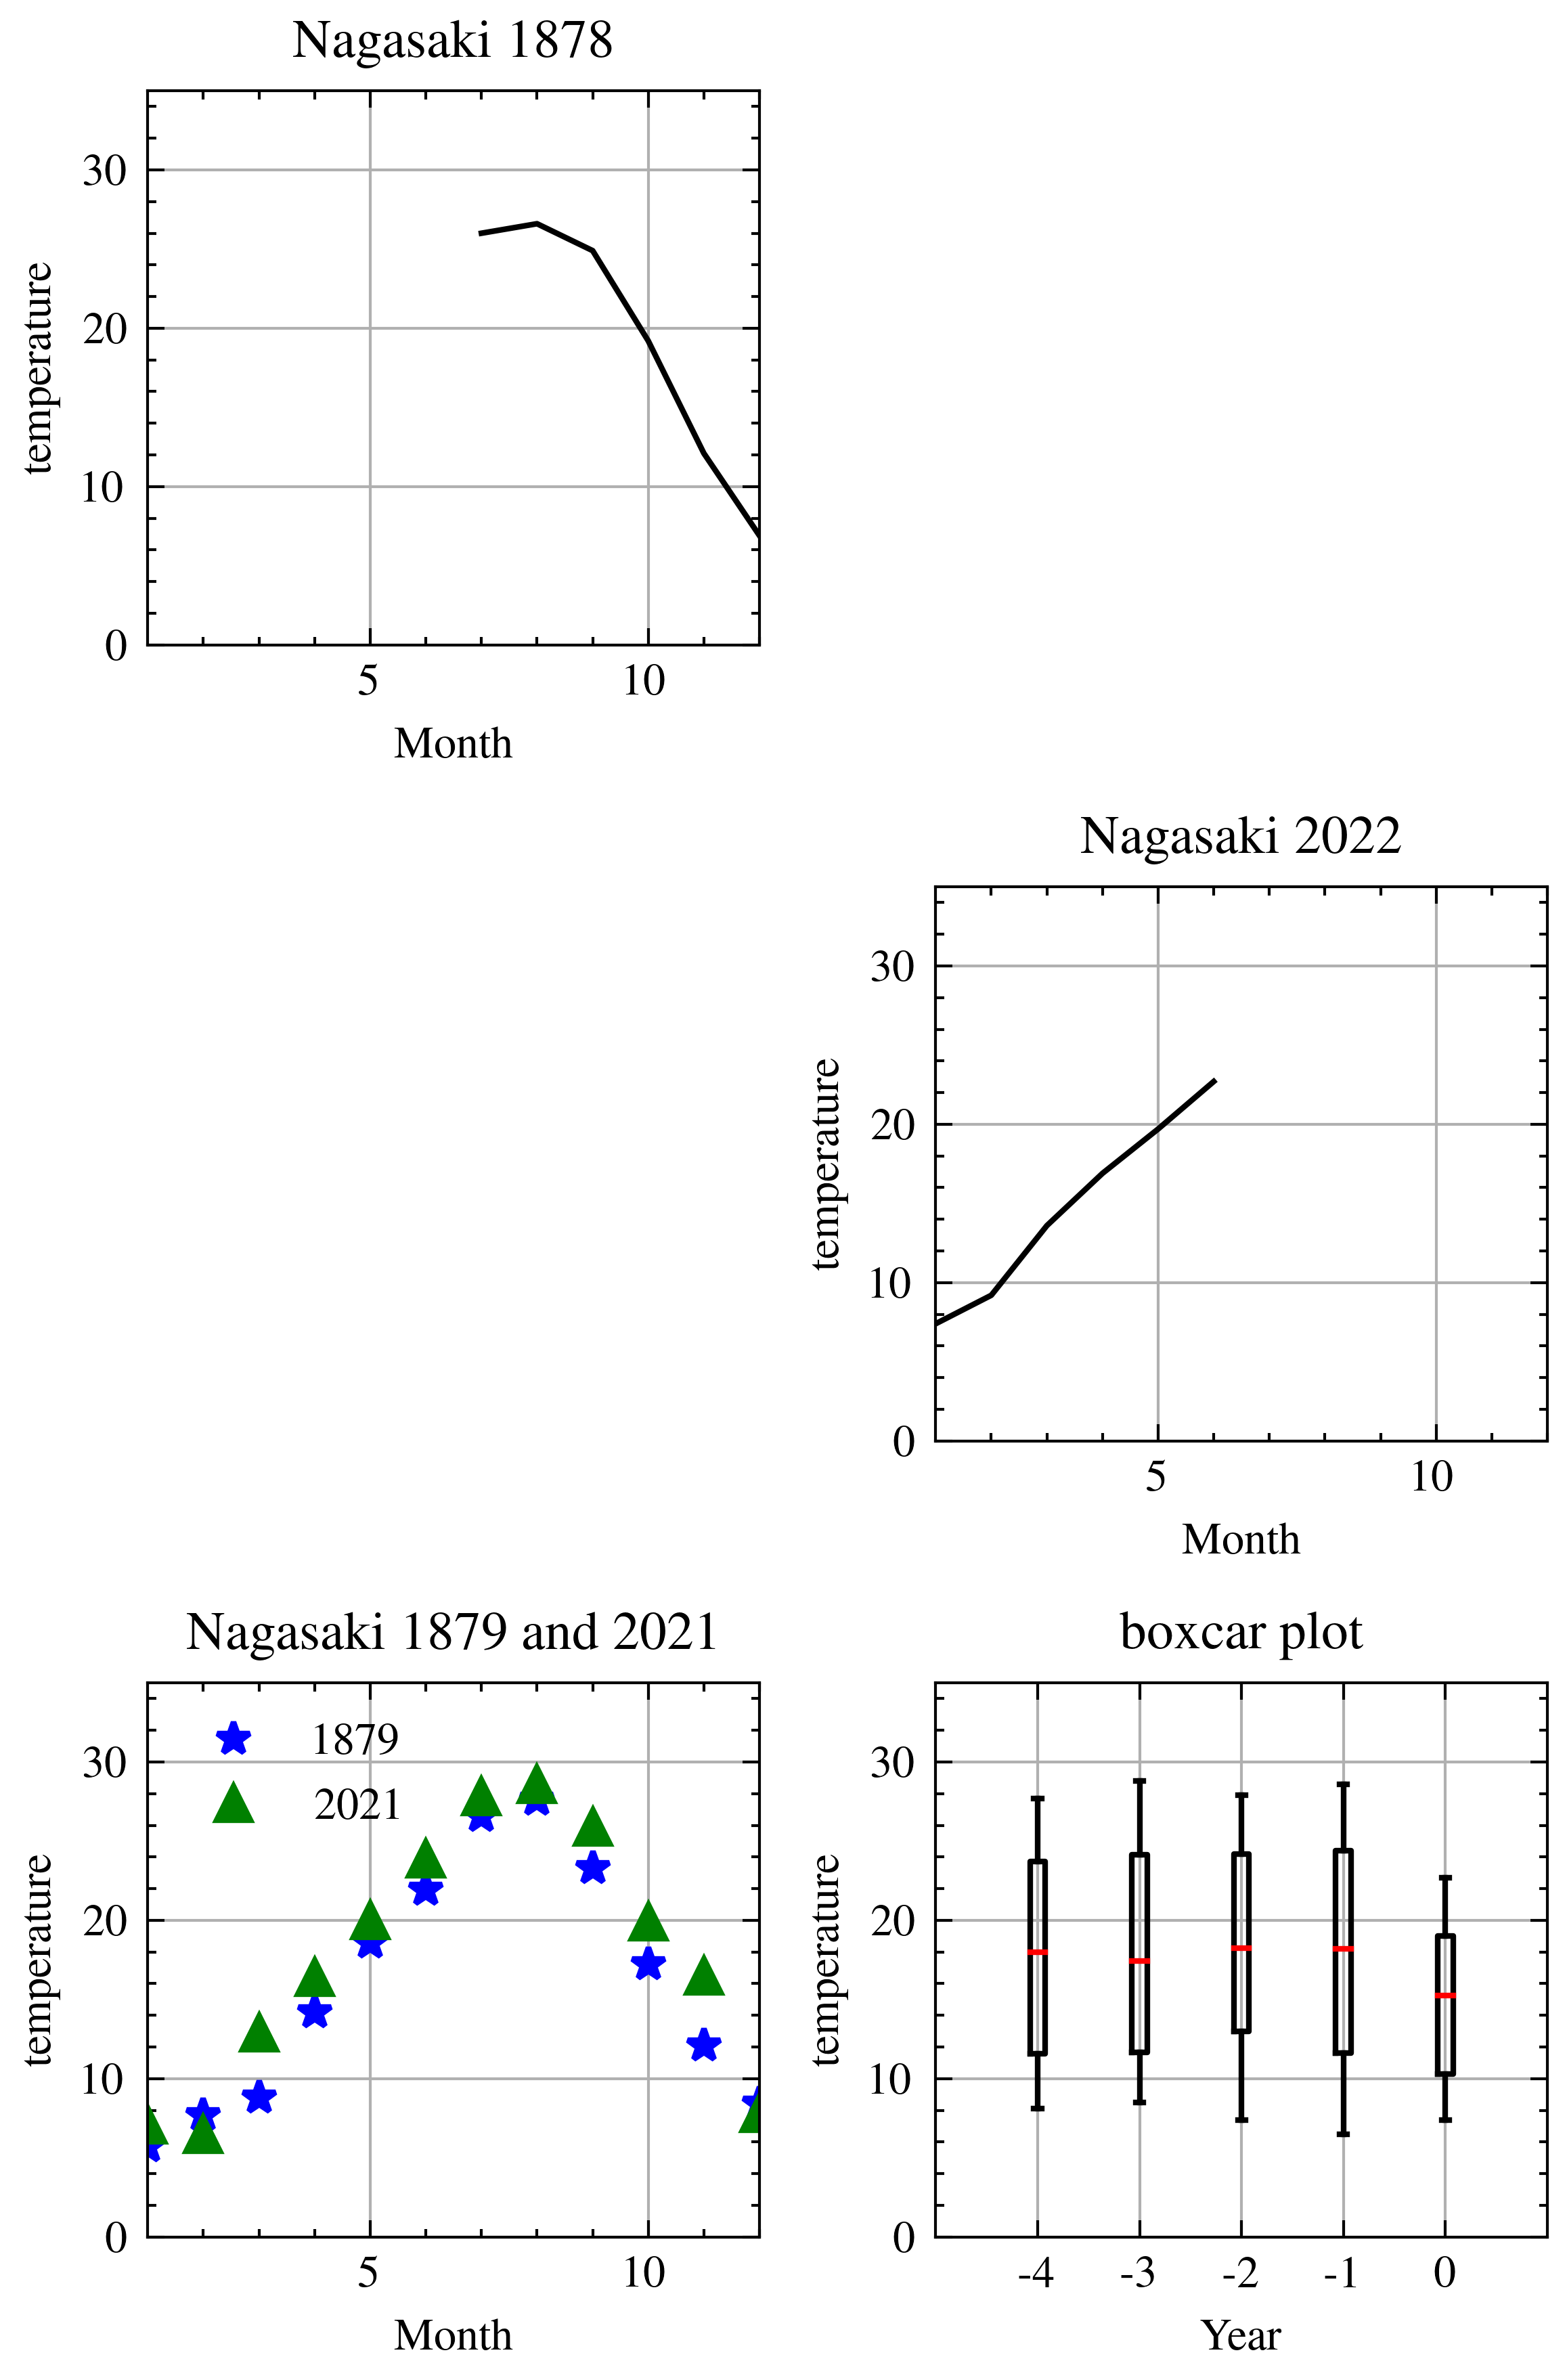

In [35]:
ax4 = fig.add_subplot(3,2,6)
ax4.boxplot(df6['temperature'][-6:],positions=[0])
ax4.boxplot(df6['temperature'][-18:-6],positions=[-1])
ax4.boxplot(df6['temperature'][-30:-18],positions=[-2])
ax4.boxplot(df6['temperature'][-42:-30],positions=[-3])
ax4.boxplot(df6['temperature'][-54:-42],positions=[-4])
ax4.set_xlabel('Year')
ax4.set_ylabel('temperature')
ax4.set_title('boxcar plot')
ax4.set_ylim([0,35])
ax4.set_xlim([-5, 1])
ax4.grid()
fig


fig

## 課題 k03



上記で紹介した[リンク](https://www.data.jma.go.jp/obd/stats/etrn/view/monthly_s3.php?prec_no=84&block_no=47817&year=&month=&day=&view=a1) https://www.data.jma.go.jp/obd/stats/etrn/view/monthly_s3.php?prec_no=84&block_no=47817&year=&month=&day=&view=a1 のページには，「日平均気温」の表が見えていますが，
「日平均気温」以外にも同様の形式のデータを選ぶことができます.
また，全く別の気象庁以外のページを読んでもいいです．

適当なデータをスクレイピングして，4種類のグラフを1枚のキャンバスに図示するプログラム`k03.py`を作成せよ．グラフのタイトルや軸ラベルを適切につけること．

提出物
1. `k03.py`
2. 図示したキャンバスを保存した画像
